In [1]:
1

1

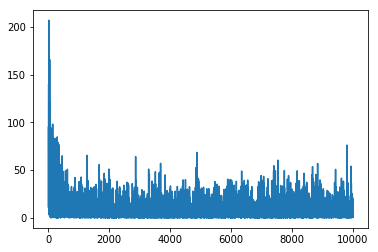

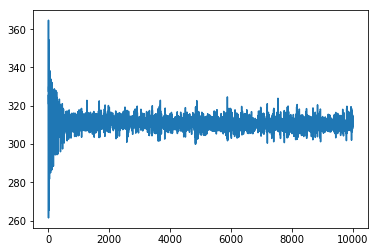

In [52]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# tf.enable_eager_execution()
# tfe = tf.contrib.eager



n = 100
# m = 100

t = tf.placeholder("float", shape=(), name="t")

w = tf.Variable(tf.random_uniform(
    [n],
    minval=2,
    maxval=3.01,
    dtype=tf.float32
), name="w")


z = tf.Variable(tf.random_uniform(
    [n],
    minval=0,
    maxval=np.pi*2,
    dtype=tf.float32
), name="z")


b    =          tf.cos(tf.add(tf.scalar_mul(t,tf.abs(w) + 1), z))
b_   = - w    * tf.sin(tf.add(tf.scalar_mul(t,tf.abs(w) + 1), z))
b__  = - w**2 * tf.cos(tf.add(tf.scalar_mul(t,tf.abs(w) + 1), z))
b___ =   w**3 * tf.sin(tf.add(tf.scalar_mul(t,tf.abs(w) + 1), z))


speed  = tf.reduce_sum(b_**2) 
speed_ = tf.reduce_sum(2*b_*b__) 

curv  = tf.reduce_sum(b__**2)
curv_ = tf.reduce_sum(2*b__*b___)


error = tf.exp( - speed) + tf.abs(speed_)



# train_op = tf.train.GradientDescentOptimizer(0.01).minimize(error)
train_op = tf.train.AdamOptimizer().minimize(error)
# Normal TensorFlow - initialize values, create a session and run the model
model = tf.global_variables_initializer()


w_ = []
z_ = []
Err= []
S = []
C = []
# sess = tf.Session() 
session = tf.Session() 
session.run(model)


w_value = np.random.sample((n,1))*1. + 1.
z_value = np.random.sample((n,1))


for i in range(10000):
    t_value = np.random.sample()*10.
    _, e, fr, ph, s, c = session.run([train_op, error, w, z, speed, curv], feed_dict= {
        t: t_value
    })

    w_.append(fr)
    z_.append(ph)
    Err.append(e)
    S.append(s)
    C.append(c)

plt.plot(Err)
plt.show()

plt.plot(S)
plt.show()


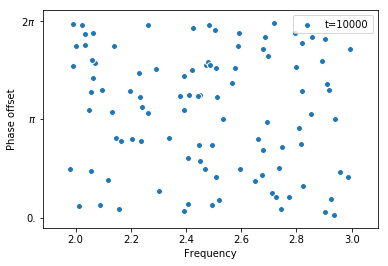

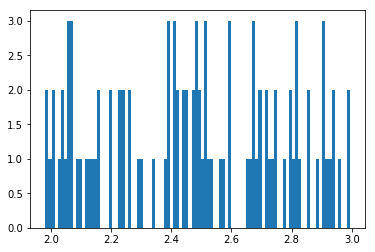

In [53]:
freq = np.array(w_)[-1]
off  = np.array(z_)[-1]%(np.pi*2)

plt.xlim(np.amin(freq)-0.1, np.amax(freq)+0.1)
plt.xlabel("Frequency")
plt.ylabel("Phase offset")
plt.yticks([0.,np.pi, 2*np.pi],["0.","$\pi$","$2\pi$"])


plt.scatter(freq,off, label="t={}".format(len(w_)), edgecolor="white")
# plt.plot([np.amin(freq),np.amax(freq)],[np.amin(freq),np.amax(freq)], c="gray",linestyle=':')

plt.legend()

plt.show()


plt.hist(freq,bins=100)

plt.show()


In [60]:
for i in range(100000):
    t_value = np.random.sample()*10.
    _, e, fr, ph, s, c = session.run([train_op, error, w, z, speed, curv], feed_dict= {
        t: t_value
    })

    w_.append(fr)
    z_.append(ph)
    Err.append(e)
    S.append(s)
    C.append(c)

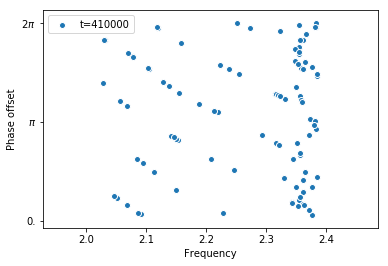

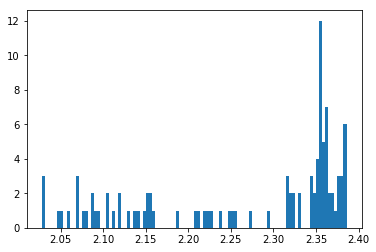

In [61]:
freq = np.array(w_)[-1]
off  = np.array(z_)[-1]%(np.pi*2)

plt.xlim(np.amin(freq)-0.1, np.amax(freq)+0.1)
plt.xlabel("Frequency")
plt.ylabel("Phase offset")
plt.yticks([0.,np.pi, 2*np.pi],["0.","$\pi$","$2\pi$"])


plt.scatter(freq,off, label="t={}".format(len(w_)), edgecolor="white")
# plt.plot([np.amin(freq),np.amax(freq)],[np.amin(freq),np.amax(freq)], c="gray",linestyle=':')

plt.legend()

plt.show()


plt.hist(freq,bins=100)

plt.show()


In [20]:
print len(w_)

110000


(110000, 1000)


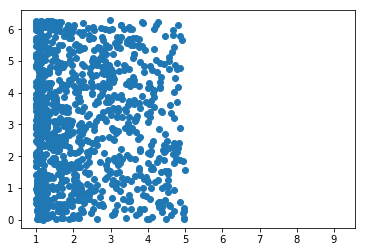

In [21]:
import matplotlib.animation as animation

freq = np.array(w_)
off  = np.array(z_)%(2.*np.pi)


ims = []


fig = plt.figure()
sc = plt.scatter(freq[-10],off[-10])

print freq.shape


def update_plot(i, data, scat):
    offsets = np.hstack([
        data[0][[i]].T,
        data[1][[i]].T
        ])
    scat.set_offsets(offsets)
    return scat,



ani = animation.FuncAnimation(fig, update_plot, frames=np.arange(-110000,0,step=1000),
                                  fargs=([freq,off], sc))




ani.save('dynamic_images.mp4')

plt.show()

262.69061045324025


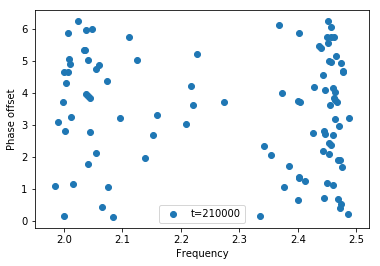

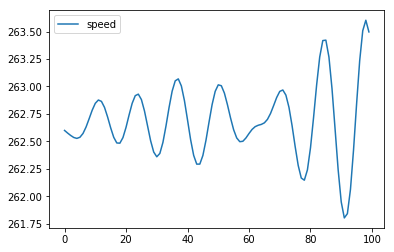

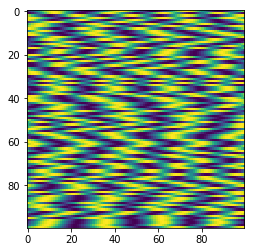

In [47]:

ts = np.linspace(0.,10.,num=100).reshape((-1,1))

freq = np.array(w_)[-1]
off  = np.array(z_)[-1]%(np.pi*2)

# subset = np.where( (freq > 2.2)  * (freq < 2.3))

# freq = freq[subset]
# off  = off[subset]

# order = np.argsort(off)
# freq = freq[order]
# off = off[order]
# freq = np.ones(n)
# off  = np.linspace(0.,np.pi*2,num=n, endpoint=False)



gamma = np.cos(freq*ts + off)
vel  =  - freq    * np.sin(freq*ts + off)

vel_ =  - freq**2 * np.cos(freq*ts + off)
speed  = np.sum(vel**2, axis=1)
speed_ = np.sum(2*vel*vel_, axis=1)

print np.mean(speed)

plt.xlabel("Frequency")
plt.ylabel("Phase offset")
plt.scatter(freq, off, label="t={}".format(len(w_)))
plt.legend()
plt.show()


plt.plot(speed, label="speed");
plt.legend();
plt.show()

plt.imshow(gamma.T)

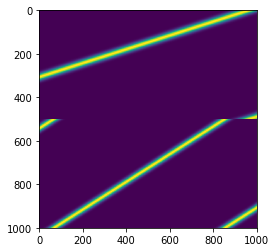

In [139]:
t = np.linspace(0.,4.,num=1000).reshape((1,-1))

n = 1000
m = 5
w = np.ones((n,1))
z = np.zeros((n,1))

def code(m, n, t, s):
    for i in range(m):
        num = n//m
        w[i*num:i*num + num, 0] = s[i]
        z[i*num:i*num + num, 0] = np.linspace(0.,2.*np.pi, num=num, endpoint=False)
        
        z[i*num:i*num + num, 0] = z[i*num:i*num + num, 0] +  np.random.sample()*np.pi*2.

    f = np.cos(t*w + z)
    f = np.exp(50.*f)
    f = f/np.sum(f, axis=0, keepdims=True)
    
    return f

def fisher(f):
    logf = np.log(f)
    d_logf = -logf[:,:-1] + logf[:,1:]
    I = np.sum(f[:,:-1]*d_logf**2, axis=0)
    return I


def entropy(f):
    logf = np.log(f)
    H = - np.sum(f*logf, axis=0)
    return H



plt.imshow(code(2, n, t, [1.,2.]))
plt.show()

# plt.plot(df[0])
# plt.plot(np.log(f))
# plt.plot(1./f*f_)




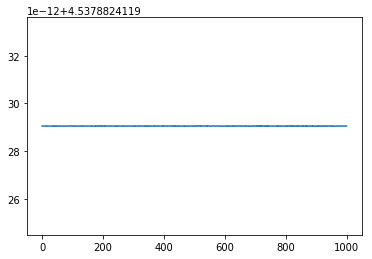

In [140]:
plt.plot(entropy(code(1, n, t, [1.])))

# plt.plot(fisher(code(5, n, t, [1.,2.,3,1,1])))
# plt.plot(fisher(code(1, n, t, [1.])))

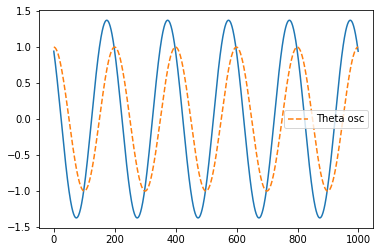

In [210]:
t = np.linspace(0.,np.pi*10,num=1000)

phi0 = 1.
phi = .1*np.pi*2.
r = np.cos(t) + np.cos(t + phi0 + phi)

plt.plot(r)
plt.plot(np.cos(t), linestyle="--", label="Theta osc")
plt.legend()